In [1]:
# Import Package
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1. Background
With the increasing use of online transactions, the financial technology industry has experienced exponential growth over the past few years. As digital payments and e-wallet services become more accessible to the public, companies need to adapt quickly to the rapidly evolving industry landscape. However, the rapid growth of digital transactions also increases the risk of financial fraud and crime. As transaction volumes rise, detecting suspicious activities becomes more complex. Therefore, conducting data analysis and developing predictive models are essential to minimize financial losses.

# 2. ETL (Extract, Transform, Load)
ETL (Extract, Transform, Load) is a process that converts raw data into a structured format ready for analysis. In this project, the dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection) and stored in a relational database to simulate a real-world scenario.

## 2.1 Extract Data From Postgres Database
In this stage, the data is extracted from the PostgreSQL database using the psycopg2 library. The entire table is retrieved and converted into a pandas DataFrame for further processing and analysis.

In [2]:
# Make a connection to the postgres server
conn = psycopg2.connect(
    host="localhost",
    database="Projects",
    user="postgres",
    password="postgres",
    port="5432"
)

# SQL query to show the dataset
query = "SELECT * FROM transactions;"

# Turn the dataset to dataframe
df = pd.read_sql(query, conn)

# Show first 5 rows of the dataframe
display(df)

# Close connection to postgres sever
conn.close()

C:\Users\wimsu\AppData\Local\Temp\ipykernel_64356\1542664068.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,transaction_id,account_id,transaction_amount,transaction_date,transaction_type,location,device_id,ip_address,merchant_id,channel,customer_age,customer_occupation,transaction_duration,login_attempts,account_balance,previous_transaction_date
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


## 2.2 Transform Data (Data Cleaning)
In this phase, the data is processed to become analysis-ready. The process includes cleaning the data, data validation and ensuring consistency across all variables. This dataset covers the period from January 1, 2023 to January 2, 2024 (approximately one year). However, the data for January 2024 only contains a very small number of transactions and does not represent a full month. Therefore, the dataset was truncated at December 31, 2023 to ensure consistent and comparable monthly analysis.

In [3]:
# Data Filtering
df=df[df['transaction_date'].dt.year==2023]

# Check if the dataframe have missing values or wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   transaction_id             2499 non-null   object        
 1   account_id                 2499 non-null   object        
 2   transaction_amount         2499 non-null   float64       
 3   transaction_date           2499 non-null   datetime64[ns]
 4   transaction_type           2499 non-null   object        
 5   location                   2499 non-null   object        
 6   device_id                  2499 non-null   object        
 7   ip_address                 2499 non-null   object        
 8   merchant_id                2499 non-null   object        
 9   channel                    2499 non-null   object        
 10  customer_age               2499 non-null   int64         
 11  customer_occupation        2499 non-null   object        
 12  transaction

From the information given above, the dataframe does not have any missing value and wrong data type. Next we will check wheather their is any outliers in the numeric features. Depending on the distribution of the feature, the methods used to handle the outlier will be different. To classify weather the numeric feature is normally distributed or not, we will use the range below:
- Normal: -0.5 < Skew < 0.5
- Not Normal: Skew < -0.5 or Skew > 0.5

In [4]:
# List of numeric features
df_num=['transaction_amount','customer_age','transaction_duration','login_attempts','account_balance']
num_norm=[]
num_not_norm=[]
for i in df_num:
    skew=df[i].skew()
    if skew>0.5 or skew<-0.5:
        num_not_norm.append(i)
    else:
        num_norm.append(i)

print(f"Numeric features distributed normally {num_norm}")
print(f"Numeric features not distributed normally {num_not_norm}")

Numeric features distributed normally ['customer_age']
Numeric features not distributed normally ['transaction_amount', 'transaction_duration', 'login_attempts', 'account_balance']


We can seee that the only numeric feature that is distributed normally is 'customer_age' and the rest is not distributed normally. The methods used to determine outliers for the normally distributed feature is Z-score with a conficence of 95% ($\alpha$ = 5%). To calculate the upper and lower bound, we will use this formula:

$\text{Upper Bound} = \mu + Z_{\frac{\alpha}{2}} \cdot \sigma$

$\text{Lower Bound} = \mu - Z_{\frac{\alpha}{2}} \cdot \sigma$

Where:   
- $\mu$ = mean of the feature  
- $\sigma$ = standard deviation of feature
- $Z_{\frac{0.05}{2}} = 1.96 \approx 2$

And fot the feature that is not distributed normally, the method used to find the lower and upper bound is IQR (Inter Quartil Range). The formula is as follows:

$\text{Lower Bound} = Q1 - 1.5 \cdot \text{IQR}$

$\text{Upper Bound} = Q3 + 1.5 \cdot \text{IQR}$

Where:
- Q1 is the 25th percentile
- Q3 is the 75th percentile
- IQR = Q3 - Q1

In [5]:
# Feature Normally Distributed
for i in num_norm:
    mean=df[i].mean()
    sd=df[i].std()
    Lower_Bound=mean-2*sd
    Upper_Bound=mean+2*sd
    print(f"Lower Bound-{i}:{Lower_Bound}")
    print(f"Upper Bound-{i}:{Upper_Bound}")
    if df[i].min()<Lower_Bound or df[i].max()>Upper_Bound:
        print(f"{i} have some outlier")
        print()
    else:
        print(f"{i} don't have some outlier")
        print()

df['customer_age'].describe()     

Lower Bound-customer_age:9.032064454897572
Upper Bound-customer_age:80.27405799408203
customer_age don't have some outlier



count    2499.000000
mean       44.653061
std        17.810498
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: customer_age, dtype: float64

From the result above we get that the lower bound is 9 years old and the upper bound is 80 years old, because the range of the data is still within the lower and upper bound there is no outlier for "customer_age".

In [6]:
# Feature Not Narmally Distributed
have_outllier=[]
for i in num_not_norm:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    Lower_Bound=q1-1.5*iqr
    Upper_Bound=q3+1.5*iqr
    print(f"Lower Bound-{i}:{Lower_Bound}")
    print(f"Upper Bound-{i}:{Upper_Bound}")
    if df[i].min()<Lower_Bound or df[i].max()>Upper_Bound:
        have_outllier.append(i)
        print(f"{i} have some outlier")
        print()
    else:
        print(f"{i} don't have some outlier")
        print()
print(f"List of features with outlier {have_outllier}")

Lower Bound-transaction_amount:-417.48499999999996
Upper Bound-transaction_amount:915.595
transaction_amount have some outlier

Lower Bound-transaction_duration:-84.0
Upper Bound-transaction_duration:308.0
transaction_duration don't have some outlier

Lower Bound-login_attempts:1.0
Upper Bound-login_attempts:1.0
login_attempts have some outlier

Lower Bound-account_balance:-7768.719999999999
Upper Bound-account_balance:16949.04
account_balance don't have some outlier

List of features with outlier ['transaction_amount', 'login_attempts']


We can observe from the result above that only two features contain outlier: 'transaction_amount' and 'login_attempts'. Further analysis will be done to each feature to determine whether the outliers are extreme or plausible.

In [7]:
## 'transaction_amount'
display(df['transaction_amount'].describe())

## 'login_attempts'
display(df['login_attempts'].describe())

count    2499.000000
mean      298.315434
std       292.386227
min         0.260000
25%        82.420000
50%       211.360000
75%       415.690000
max      1919.110000
Name: transaction_amount, dtype: float64

count    2499.000000
mean        1.124850
std         0.603913
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: login_attempts, dtype: float64

For transaction_amount, even though the maximum value is almost twice the calculated upper bound, the amount is still within a plausible real-world range. Large transactions can naturally occur depending on customer behavior. For login_attempts, the maximum value is 5, which is still realistic. This could happen, for example, when a user enters an incorrect PIN multiple times. However, repeated login attempts may also indicate potential fraudulent activity. Therefore, no modifications will be made to these values at this stage, but they will be further analyzed in subsequent steps.


To enhance customer segmentation analysis, a new feature called age_group was created based on customers' age in 2023. This categorization groups customers into generational cohorts (Gen Alpha, Gen Z, Millennials, Gen X, and Baby Boomers). The age group will be grouped based on this table:
| Generation      | Age in 2023 |
|----------------|-------------|
| Gen Alpha     | 0–10 years  |
| Gen Z         | 11–26 years |
| Millennials   | 27–42 years |
| Gen X         | 43–58 years |
| Baby Boomers  | 59–80 years |

The purpose of this transformation is to simplify demographic analysis and identify behavioral patterns, purchasing trends, and revenue contribution across different generations.

Other then making new age group feataure, a new feature for day name will be added to help analyze what day has the most transaction.

In [8]:
# Creating New Columns
AgeGroup=[]
for i in df['customer_age']:
    if 10 <= i <= 26:
        AgeGroup.append("Gen Z")
    elif 27 <= i <= 42:
        AgeGroup.append("Millennials")
    elif 43 <= i <= 58:
        AgeGroup.append("Gen X")
    else:
        AgeGroup.append("Baby Boomers")

df['Age_Group']=AgeGroup

df["Day_Name"] = df["transaction_date"].dt.day_name()

df.head()

C:\Users\wimsu\AppData\Local\Temp\ipykernel_64356\1960209051.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group']=AgeGroup
C:\Users\wimsu\AppData\Local\Temp\ipykernel_64356\1960209051.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day_Name"] = df["transaction_date"].dt.day_name()


,transaction_id,account_id,transaction_amount,transaction_date,transaction_type,location,device_id,ip_address,merchant_id,channel,customer_age,customer_occupation,transaction_duration,login_attempts,account_balance,previous_transaction_date,Age_Group,Day_Name
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,Baby Boomers,Tuesday
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,Baby Boomers,Tuesday
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,Gen Z,Monday
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,Gen Z,Friday
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,Gen Z,Monday


## 2.3 Load Data
After transforming the data, the cleaned dataset was loaded for further analysis.

In [9]:
# Download the clean data
df.to_csv("data_clean.csv", index=False)
df

,transaction_id,account_id,transaction_amount,transaction_date,transaction_type,location,device_id,ip_address,merchant_id,channel,customer_age,customer_occupation,transaction_duration,login_attempts,account_balance,previous_transaction_date,Age_Group,Day_Name
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,Baby Boomers,Tuesday
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,Baby Boomers,Tuesday
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,Gen Z,Monday
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,Gen Z,Friday
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,Gen Z,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,Millennials,Wednesday
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,Gen X,Wednesday
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,Gen X,Monday
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,Gen Z,Friday


In [10]:
# Change decimal point from '.' to ',' for tablue
df1=df.copy()
df1['transaction_amount'] = df1['transaction_amount'].astype(str).str.replace('.', ',', regex=False)
df1['account_balance'] = df1['account_balance'].astype(str).str.replace('.', ',', regex=False)

# Save
df1.to_csv("data_clean_tableau.csv", index=False)

# 3. Analysis

This analysis phase focuses on examining the prepared dataset to uncover meaningful insights and evaluate key performance indicators (KPIs). By analyzing transaction trends, monthly performance, and overall transaction volume, this section aims to assess business performance patterns and identify potential growth opportunities. The results of this analysis will provide data-driven insights to support strategic decision-making.

## 3.1. What is the total transaction volume?
This section provides an overview of total transaction activity and its monthly trend throughout the observed period. By analyzing both the overall transaction volume and its month-to-month movement, we can assess business performance, identify growth patterns, and detect potential fluctuations over time.

The total transaction made from January 2023 to December 2023 is 745490.27
The average transaction made each month is 62124.18916666667


,total_volume
transaction_date,
2023-01,63899.04
2023-02,57516.10
2023-03,61036.12
2023-04,41003.84
2023-05,62868.01
2023-06,61559.58
2023-07,58861.39
2023-08,71437.76
2023-09,72832.25


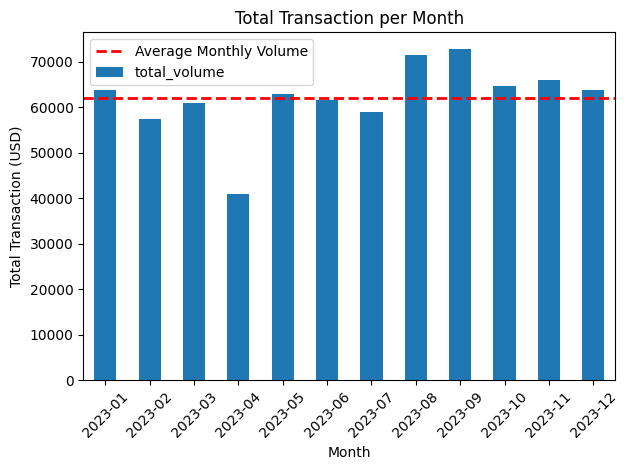

In [11]:
# Montly Transaction Amount
monthly_data = df.groupby(df['transaction_date'].dt.to_period('M')).agg(
    total_volume=('transaction_amount', 'sum')
)

# Total Transaction
total_transaction=df['transaction_amount'].sum()
print(f"The total transaction made from January 2023 to December 2023 is {total_transaction}")

# hitung rata-rata
avg_volume = monthly_data['total_volume'].mean()
print(f"The average transaction made each month is {avg_volume}")

# pastikan index jadi string biar rapi
monthly_data.index = monthly_data.index.astype(str)
display(monthly_data)

plt.figure()

# bar chart
monthly_data['total_volume'].plot(kind='bar')

# garis rata-rata
plt.axhline(
    y=avg_volume,
    linestyle='--',
    color='red',
    linewidth=2,
    label='Average Monthly Volume'
)

plt.title('Total Transaction per Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

From the bar chart above there is a few usefull insights that can be taken.
- The average monthly transaction amount is 62,124, with a total annual transaction value of 745,490.
- April recorded the lowest transaction value, significantly below the monthly average.
- September achieved the highest transaction value, surpassing the monthly average by approximately 10,000.
- The final five months of the year consistently exceeded the monthly average, suggesting a strong upward purchasing trend toward year-end.

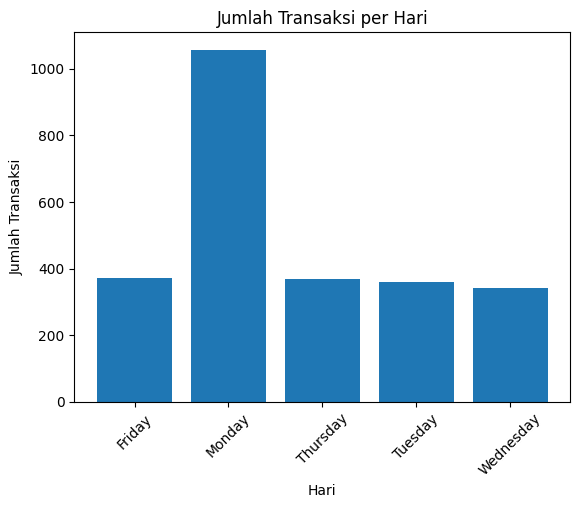

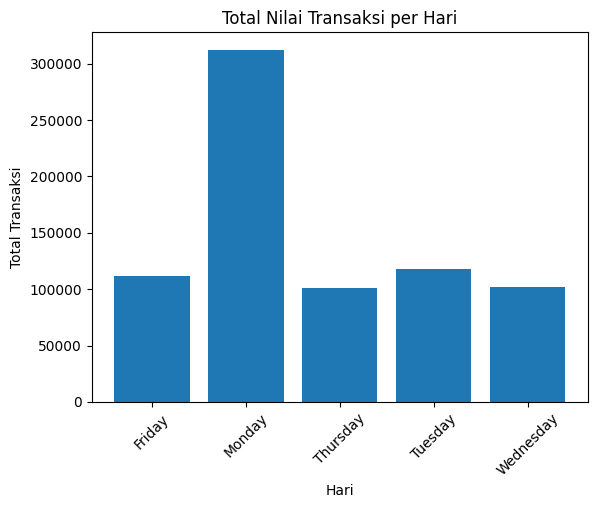

In [12]:
# Day Analysis
transaction_count = df.groupby("Day_Name")["transaction_id"].count().reset_index()
transaction_count.columns = ["Day_Name", "count_transaction"]

transaction_sum = df.groupby("Day_Name")["transaction_amount"].sum().reset_index()
transaction_sum.columns = ["Day_Name", "total_transaction"]

summary = df.groupby("Day_Name").agg(
    num_transaction=("transaction_id", "count"),
    total_transaction=("transaction_amount", "sum")
).reset_index()

plt.figure()
plt.bar(summary["Day_Name"], summary["num_transaction"])
plt.title("Jumlah Transaksi per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

plt.figure()
plt.bar(summary["Day_Name"], summary["total_transaction"])
plt.title("Total Nilai Transaksi per Hari")
plt.xlabel("Hari")
plt.ylabel("Total Transaksi")
plt.xticks(rotation=45)
plt.show()

From the two bar chart above, we can see that the data only recorded transaction made in the weekdays. Aside from that Monday by far has the most transaction made and amount.

## 3.2 Age Group Analysis

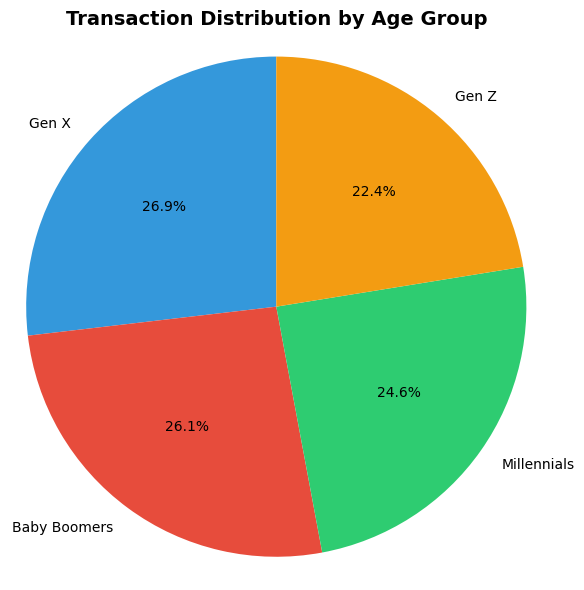

In [13]:
#
# Count transactions per age group
age_counts = df['Age_Group'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(age_counts, 
        labels=age_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])

plt.title('Transaction Distribution by Age Group', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures circle shape
plt.tight_layout()
plt.show()


Although transaction volumes are relatively balanced across age groups, the average transaction amount, rather than the total is a more accurate indicator of which age group conducts the largest individual transactions.

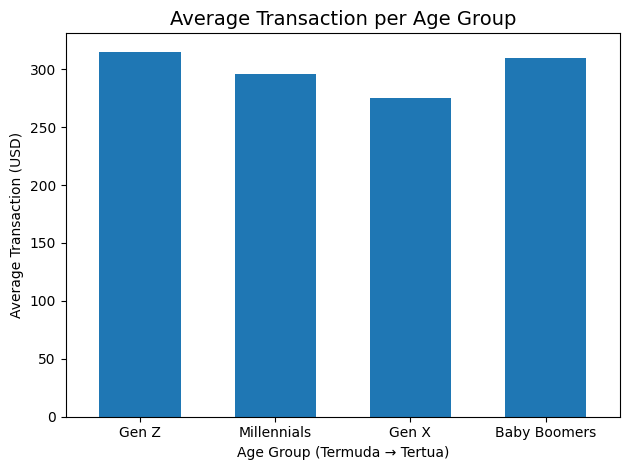

Total amount for each aage group


Age_Group
Baby Boomers    201794.59
Gen X           184787.26
Gen Z           176827.48
Millennials     182080.94
Name: transaction_amount, dtype: float64

In [14]:
age_order = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers']

# Hitung total transaksi & urutkan sesuai age_order
total = df.groupby('Age_Group')['transaction_amount'].sum()
avg = df.groupby('Age_Group')['transaction_amount'].mean()
avg = avg.reindex(age_order).dropna()  # hanya ambil yang ada di data

# Visualisasi simpel
avg.plot(kind='bar', width=0.6)
plt.title('Average Transaction per Age Group', fontsize=14)
plt.ylabel('Average Transaction (USD)')
plt.xlabel('Age Group (Termuda → Tertua)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Total amount for each aage group")
display(total)

From the result above we can conclude:
- The distribution of the age group is fairly distributed.
- The age group that spends the most on average are Baby Boomers and Gen Z
- The age group with the highest total transaction amount is Baby Boomers

## 3.3 Transaction Type Analysis (Credit vs Debit)

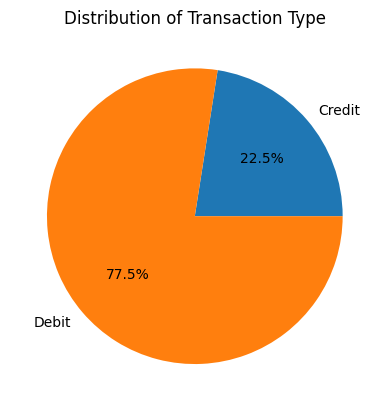

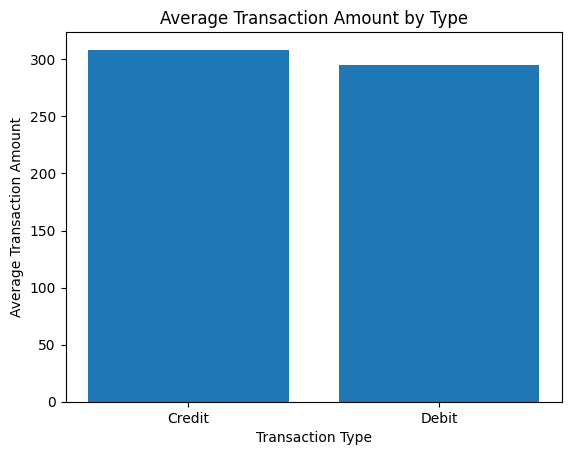

In [15]:
summary_type = df.groupby("transaction_type")["transaction_id"].count()

summary_avg = df.groupby("transaction_type").agg(
    avg_amount=("transaction_amount", "mean")
).reset_index()


plt.figure()
plt.pie(
    summary_type,
    labels=summary_type.index,
    autopct='%1.1f%%'
)
plt.title("Distribution of Transaction Type")
plt.show()

plt.figure()
plt.bar(summary_avg["transaction_type"], summary_avg["avg_amount"])
plt.title("Average Transaction Amount by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Average Transaction Amount")
plt.show()


From the result above we can see that 77.5% of the transaction made with a debit card. But on average transactions made using credit card have a higher amount than debit.

## 3.4 Occupation Analysis

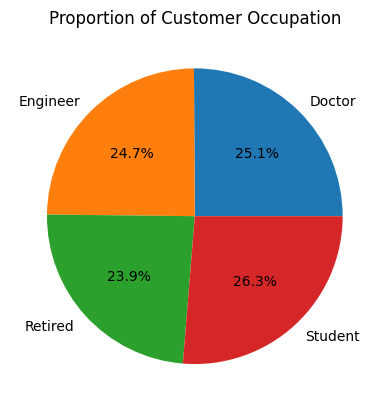

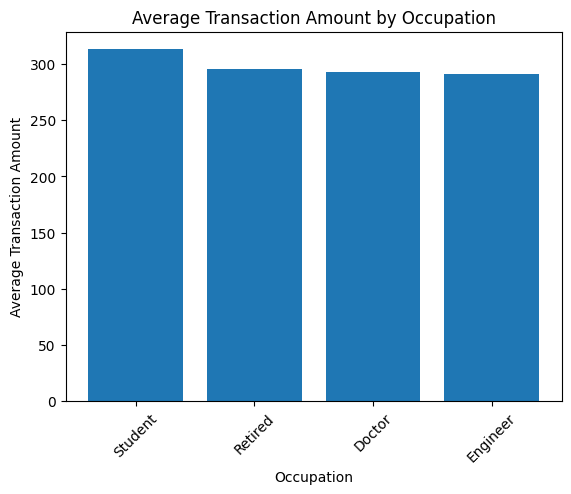

In [16]:
occupation_count = df.groupby("customer_occupation")["transaction_id"].count()

occupation_avg = df.groupby("customer_occupation")["transaction_amount"].mean().reset_index()
occupation_avg = occupation_avg.sort_values("transaction_amount", ascending=False)

plt.figure()
plt.pie(
    occupation_count,
    labels=occupation_count.index,
    autopct='%1.1f%%'
)
plt.title("Proportion of Customer Occupation")
plt.show()

plt.figure()
plt.bar(occupation_avg["customer_occupation"], occupation_avg["transaction_amount"])
plt.title("Average Transaction Amount by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=45)
plt.show()

The proportion of customer occupation is relatively balanced across all groups. Even though occupation distribution is balanced, Students slightly stand out in terms of transaction value. But since the difference is relatively small, we should not conclude that occupation strongly determines spending behavior without deeper analysis.

## 3.5 Channel Preference Analysis

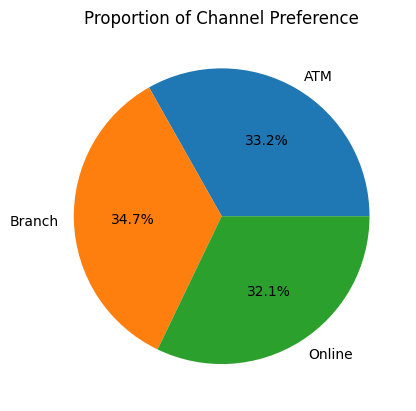

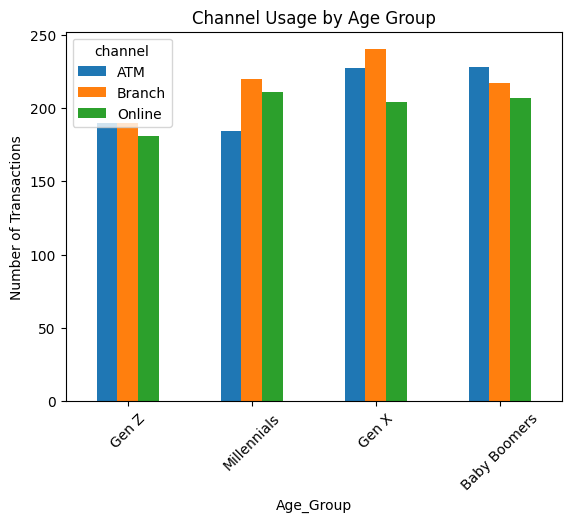

In [17]:
channel_count = df.groupby("channel")["transaction_id"].count()


channel_age = df.groupby(["Age_Group","channel"])["transaction_id"].count().unstack()
age_order = ["Gen Z","Millennials","Gen X","Baby Boomers"]
channel_age = channel_age.reindex(age_order)


plt.figure()
plt.pie(
    channel_count,
    labels=channel_count.index,
    autopct='%1.1f%%'
)
plt.title("Proportion of Channel Preference")
plt.show()


channel_age.plot(kind="bar")
plt.title("Channel Usage by Age Group")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


Overall, the proportion of channel preference appears relatively balanced. 
However, the distribution varies across different age groups.

- Gen Z uses all channels relatively equally, showing no strong preference for a specific channel.
- Millennials tend to use Branch and Online channels more frequently, 
  while ATM usage is comparatively lower.
- Gen X shows a preference for more traditional channels, 
  using ATM and Branch more often than Online, with Branch being the most used channel.
- Baby Boomers also prefer traditional channels, 
  primarily using ATM and Branch, with ATM being their most frequently used channel.

# 4. Dashboard

# 5. Business Insight and Recomendation

## Business Insight
From the result of the analysis these are the business ingisht:
- Transaction value shows a clear upward trend toward the end of the year. The last five months consistently exceeded the monthly average, with September being the highest. But there is a dip in transaction on April.
- All recorded transactions occurred on weekdays, with Monday showing the highest transaction count and value.
- Baby Boomers contribute the highest total transaction amount while, Baby Boomers and Gen Z show the highest average transaction value.
- 77.5% of transactions are made using Debit cards, but Credit card transaction have a higher average amount.
-Channel preference overall is balanced, but age segmentation reveals behavioral differences. Younger segments are more digitally adaptive, while older segments prefer traditional channels (ATM & Branch).

##  Business Recomendation
From the business insights above, these are the recommended strategic actions:
- Since transaction value shows a strong upward trend toward the end of the year, the company should maximize Q3–Q4 momentum by launching targeted promotional campaigns before peak months. Additionally, specific campaigns should be introduced in April to address the noticeable transaction dip and stabilize performance throughout the year.
- Because Monday records the highest transaction count and value, the business can introduce Monday-exclusive promotions or early-week marketing pushes to further capitalize on this momentum. At the same time, weekend campaigns could be tested to stimulate transaction activity outside peak weekdays.
- Given that Baby Boomers contribute the highest total transaction value, the company should maintain strong service accessibility for this segment, especially through ATM and Branch channels. Meanwhile, Gen Z’s high average transaction value presents an opportunity for digital-first promotions and loyalty programs tailored to younger customers.
- Although Debit cards dominate transaction frequency (77.5%), Credit card transactions generate higher average value. The business should encourage greater credit card utilization through cashback incentives, installment programs, and targeted upgrade campaigns to increase revenue per transaction.
- Since younger segments are more digitally adaptive while older segments prefer traditional channels, the company should implement digital adoption initiatives for older customers, such as onboarding assistance, educational campaigns, and incentives for first-time online transactions. This can improve operational efficiency and reduce long-term branch dependency.